In [1]:
import os
import pandas as pd
import numpy as np
import json
import plotly.graph_objects as go
import nltk
import re
import matplotlib.pyplot as plt
import textwrap
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
%load_ext autoreload

In [30]:
%autoreload 2

In [2]:
path = "../facebook-danielsalamon3\messages\inbox\pozytywnaekipa_1494021607299571"
#path = "../facebook-danielsalamon3/messages/inbox/ahofnnordurljosa_1977554722293928"
#path = "../facebook-danielsalamon3/messages/inbox/polacywholandii_4516574725125124"

In [ ]:
%au

In [31]:
from plot_functions import plot_monthly_messages, distribution_pie, generate_wordcloud
from pdf_builder_functions import create_transparent_image_with_text
from processing_functions import tokenize_messages, prepare_word_freq_distribution, prepare_data, received_reactions_stats, granted_reaction_stats_per_user, get_conversation_stats, get_stats_per_user, get_badges

In [4]:
df = prepare_data(path)

In [5]:
distribution_pie(df)

In [6]:
generate_wordcloud(tokenize_messages(df, path_to_stopwords="resources/pl_stopwords.txt"))

In [7]:
df.head()

,sender_name,timestamp_ms,content,reactions,datetime,month
0,Kuba Falski,1672587137806,Same shit different year,"[{'reaction': 'ð', 'actor': 'Kamil Bielecki'}]",2023-01-01 15:32:17.806,1
1,Wojciech Pierzchała,1672584978031,Granerud zrobił cieszynke haalanda,NaN,2023-01-01 14:56:18.031,1
2,Kuba Falski,1672570523245,Kochany,NaN,2023-01-01 10:55:23.245,1
3,Kuba Falski,1672570522675,nan,"[{'reaction': 'â¤', 'actor': 'Kamil Bielecki'...",2023-01-01 10:55:22.675,1
4,Kuba Falski,1672570514485,O nie zwróciłem wcześniej uwagi,NaN,2023-01-01 10:55:14.485,1


In [8]:
received_reactions_stats(df)

{'total_reactions': 13687,
 'favourite_icon_received': '😆',
 'most_reactions_received': 'Kuba Falski'}

In [9]:
stats = get_conversation_stats(df)

In [10]:
granted_reaction_stats_per_user(df)

{'Kuba Falski': {'favourite_reaction_given': '😆',
  'favourite_user_to_give': 'Wojciech Pierzchała',
  'reactions_given': 3354},
 'Wojciech Pierzchała': {'favourite_reaction_given': '😆',
  'favourite_user_to_give': 'Piotrek Sokół',
  'reactions_given': 2765},
 'Kamil Bielecki': {'favourite_reaction_given': '😆',
  'favourite_user_to_give': 'Wojciech Pierzchała',
  'reactions_given': 2967},
 'Maciej Romański': {'favourite_reaction_given': '😆',
  'favourite_user_to_give': 'Wojciech Pierzchała',
  'reactions_given': 2468},
 'Daniel Salamon': {'favourite_reaction_given': '😆',
  'favourite_user_to_give': 'Wojciech Pierzchała',
  'reactions_given': 1321},
 'Piotrek Sokół': {'favourite_reaction_given': '😆',
  'favourite_user_to_give': 'Wojciech Pierzchała',
  'reactions_given': 810},
 'Maria Kościelniak': {'favourite_reaction_given': '👍',
  'favourite_user_to_give': 'Maciej Romański',
  'reactions_given': 2}}

In [11]:
stats

{'total_messages': 77065,
 'avg_message_length': 4.62,
 'most_busy_day': '2022-11-22',
 'messgaes_on_most_busy_day': 989,
 'first_message': 'Badanie polegało na podawaniu zwierzętom alkoholu i obserwowaniu ich zachowania, aż do momentu utraty świadomości. Ostatecznie dowiedziono, że chomiki są w stanie spożyć do 20 g etanolu na kilogram masy ciała dziennie bez większej szkody dla zdrowia.\n\nNaukowcy oszacowali nawet, że stosunek spożytego przez nie alkoholu do ich wagi odpowiada 21 butelkom wina wypitym przez dorosłego mężczyznę. – Chomiki mogą tolerować takie ilości alkoholu, które w przeliczeniu na człowieka okazałyby się śmiertelne – podsumowuje dr Lawton.',
 'first_message_sender': 'Wojciech Pierzchała',
 'total_reactions': 13687,
 'most_common_reaction': '😆',
 'most_emotional_user': 'Kuba Falski'}

In [12]:
messages = (tokenize_messages(df, path_to_stopwords="resources/pl_stopwords.txt"))
c = prepare_word_freq_distribution(messages, n=1)

In [13]:
most_common = c.most_common(5)

In [14]:
most_common

[('kurwa', 1731), ('chyba', 1690), ('wiem', 717), ('se', 686), ('chuj', 630)]

In [15]:
user_stats = get_stats_per_user(df)

In [16]:
badges = get_badges(user_stats)

In [17]:
user_stats

,total_messages,avg_message_length,most_busy_day,messgaes_on_most_busy_day,first_message,first_message_sender,total_reactions,most_common_reaction,most_emotional_user,favourtie_reaction_given,favourite_user_to_give_to,total_reactions_given_to_others
Kuba Falski,23879,4.95,2022-11-22,289,Czyli o Fodenie to nie ploty,Kuba Falski,2223,😆,Kamil Bielecki,😆,Wojciech Pierzchała,3354
Wojciech Pierzchała,24635,4.65,2022-04-10,396,Badanie polegało na podawaniu zwierzętom alkoh...,Wojciech Pierzchała,3594,😆,Kuba Falski,😆,Piotrek Sokół,2765
Kamil Bielecki,8520,4.93,2022-04-10,207,PiotrekSoker.mp3,Kamil Bielecki,1843,😆,Wojciech Pierzchała,😆,Wojciech Pierzchała,2967
Maciej Romański,6205,3.84,2022-11-22,84,Kto by się spodziewał,Maciej Romański,2276,😆,Kuba Falski,😆,Wojciech Pierzchała,2468
Daniel Salamon,1936,4.81,2022-04-17,54,Kurwa sie najebalem,Daniel Salamon,633,😆,Kuba Falski,😆,Wojciech Pierzchała,1321
Piotrek Sokół,11889,4.06,2022-11-10,237,Danilo,Piotrek Sokół,3118,😆,Kuba Falski,😆,Wojciech Pierzchała,810


In [18]:
first_message_image = create_transparent_image_with_text(1000, 120, stats["first_message"], 120)
first_message_image.save("figures/first_message.png", "PNG")

In [19]:
def remove_polish_characters(input_text):
    special_chars = dict(ł = 'l', ą = 'a', ę = 'e', ż = 'z', ź = 'z', ó = 'o', ś = 's', ć = 'c', ń = 'n')
    refined_string = ""
    for c in input_text:
       
        refined_string += special_chars[c] if c in special_chars.keys() else c
    return refined_string
    

In [20]:
from fpdf import FPDF

def create_main_page(stats, most_common, badges, conversation_title):
    pdf = FPDF(orientation = 'L', unit = 'mm', format = 'A4')
    pdf.set_auto_page_break(False)
    pdf.add_page()




    pdf.image('templates/template_main.png', x = 0, y = 0, w = 297, h = 210)
    pdf.image('figures/pie.png', x = 205, y = 3, w = 70, h = 70)
    pdf.image('figures/wordcloud.png', x = 70, y = 82, w = 95, h = 60)

    pdf.set_font('helvetica', 'B', 18)
    pdf.set_text_color(33, 131, 128)
    
    pdf.set_xy(x = 9, y = 45)
    pdf.cell(w = 25, h = 10, txt = str(stats["total_messages"]), border=0, align="C", fill=False)
    
    pdf.set_xy(x = 52, y = 45)
    pdf.cell(w = 15, h = 10, txt = str(stats["total_reactions"]), border=0, align="C", fill=False)
    
    pdf.set_xy(x = 91.5, y = 45)
    pdf.cell(w = 20, h = 10, txt = str(stats["avg_message_length"]), border=0, align="C", fill=False)
    
    pdf.set_xy(x = 131.5, y = 45)
    pdf.cell(w = 32, h = 10, txt = str(stats["most_busy_day"]), border=0, align="C", fill=False)


    # Most common words section

    pdf.set_font('helvetica', 'B', 12)
    pdf.set_text_color(33, 131, 128)

    
    pdf.set_xy(x = 16, y = 100)
    pdf.cell(w = 40, h = 5, txt = most_common[0][0] + " - " + str(most_common[0][1]), border=0, align="L", fill=False)
    
    pdf.set_xy(x = 16, y = 111)
    pdf.cell(w = 40, h = 5, txt = most_common[1][0] + " - " + str(most_common[1][1]), border=0, align="L", fill=False)
    
    pdf.set_xy(x = 16, y = 122.5)
    pdf.cell(w = 40, h = 5, txt = most_common[2][0] + " - " + str(most_common[2][1]), border=0, align="L", fill=False)
    
    pdf.set_xy(x = 16, y = 133.5)
    pdf.cell(w = 40, h = 5, txt = most_common[3][0] + " - " + str(most_common[3][1]), border=0, align="L", fill=False)
    
    pdf.set_xy(x = 16, y = 145)
    pdf.cell(w = 40, h = 5, txt = most_common[4][0] + " - " + str(most_common[4][1]), border=0, align="L", fill=False)


    # Badges
    pdf.set_font('Arial', 'B', 10)
    pdf.set_text_color(33, 131, 128)

    # The Messenger
    badges["Messenger"] = [remove_polish_characters(i) for i in badges["Messenger"]]
    pdf.set_xy(x = 182, y = 118.7)
    pdf.cell(w = 30, h = 3, txt = badges["Messenger"][0], border=0, align="L", fill=False)

    pdf.set_xy(x = 182, y = 124.5)
    pdf.cell(w = 30, h = 3, txt = badges["Messenger"][1], border=0, align="L", fill=False)

    pdf.set_xy(x = 182, y = 130.2)
    pdf.cell(w = 30, h = 3, txt = badges["Messenger"][2], border=0, align="L", fill=False)

    # The Storyteller
    badges["Storyteller"] = [remove_polish_characters(i) for i in badges["Storyteller"]]
    pdf.set_xy(x = 244.5, y = 118.7)
    pdf.cell(w = 30, h = 3, txt = badges["Storyteller"][0], border=0, align="L", fill=False)

    pdf.set_xy(x = 244.5, y = 124.5)
    pdf.cell(w = 30, h = 3, txt = badges["Storyteller"][1], border=0, align="L", fill=False)

    pdf.set_xy(x = 244.5, y = 130.2)
    pdf.cell(w = 30, h = 3, txt = badges["Storyteller"][2], border=0, align="L", fill=False)

    # The Entertainer
    badges["Entertainer"] = [remove_polish_characters(i) for i in badges["Entertainer"]]
    pdf.set_xy(x = 182, y = 177.6)
    pdf.cell(w = 30, h = 3, txt = badges["Entertainer"][0], border=0, align="L", fill=False)

    pdf.set_xy(x = 182, y = 183.4)
    pdf.cell(w = 30, h = 3, txt = badges["Entertainer"][1], border=0, align="L", fill=False)

    pdf.set_xy(x = 182, y = 189)
    pdf.cell(w = 30, h = 3, txt = badges["Entertainer"][2], border=0, align="L", fill=False)

    # The Sensitivist
    badges["Sensitivist"] = [remove_polish_characters(i) for i in badges["Sensitivist"]]
    pdf.set_xy(x = 244.5, y = 177.6)
    pdf.cell(w = 30, h = 3, txt = badges["Sensitivist"][0], border=0, align="L", fill=False)

    pdf.set_xy(x = 244.5, y = 183.4)
    pdf.cell(w = 30, h = 3, txt = badges["Sensitivist"][1], border=0, align="L", fill=False)

    pdf.set_xy(x = 244.5, y = 189)
    pdf.cell(w = 30, h = 3, txt = badges["Sensitivist"][2], border=0, align="L", fill=False)


    # FIRST MESSAGE
    first_message_image = create_transparent_image_with_text(1000, 120, stats["first_message"], 120)
    first_message_image.save("figures/first_message.png", "PNG")
    pdf.set_font('Arial', 'B', 10)
    pdf.set_text_color(255, 255, 255)

    
    pdf.set_xy(x = 16, y = 172)
    pdf.image('figures/first_message.png', x = 16, y = 172, w = 142, h = 17)

    pdf.set_font('helvetica', 'B', 8)
    pdf.set_text_color(0, 0, 0)

    sender = remove_polish_characters(stats["first_message_sender"])
    pdf.set_xy(x = 128, y = 192)
    pdf.cell(w = 30, h = 3, txt = sender, border=0, align="C", fill=False)

    # Title
    pdf.set_font('helvetica', 'B', 26)
    pdf.set_text_color(255, 255, 255)

    pdf.set_xy(x = 16, y = 10)
    pdf.cell(w = 142, h = 17, txt = conversation_title, border=0, align="C", fill=False)

    return pdf

In [66]:
x = create_main_page(stats, most_common, badges, "Pozytywna Ekipa")

In [68]:
x.save("t.png")

In [40]:
pdf = create_main_page(stats, most_common, badges, "Pozytywna Ekipa")

In [70]:
user_stats

,total_messages,avg_message_length,most_busy_day,messgaes_on_most_busy_day,first_message,first_message_sender,total_reactions,most_common_reaction,most_emotional_user,favourtie_reaction_given,favourite_user_to_give_to,total_reactions_given_to_others
Kuba Falski,23879,4.95,2022-11-22,289,Czyli o Fodenie to nie ploty,Kuba Falski,2223,😆,Kamil Bielecki,😆,Wojciech Pierzchała,3354
Wojciech Pierzchała,24635,4.65,2022-04-10,396,Badanie polegało na podawaniu zwierzętom alkoh...,Wojciech Pierzchała,3594,😆,Kuba Falski,😆,Piotrek Sokół,2765
Kamil Bielecki,8520,4.93,2022-04-10,207,PiotrekSoker.mp3,Kamil Bielecki,1843,😆,Wojciech Pierzchała,😆,Wojciech Pierzchała,2967
Maciej Romański,6205,3.84,2022-11-22,84,Kto by się spodziewał,Maciej Romański,2276,😆,Kuba Falski,😆,Wojciech Pierzchała,2468
Daniel Salamon,1936,4.81,2022-04-17,54,Kurwa sie najebalem,Daniel Salamon,633,😆,Kuba Falski,😆,Wojciech Pierzchała,1321
Piotrek Sokół,11889,4.06,2022-11-10,237,Danilo,Piotrek Sokół,3118,😆,Kuba Falski,😆,Wojciech Pierzchała,810


In [41]:
user = "Piotrek Sokół"
data = df.loc[df["sender_name"] == user]
#user_stats = get_stats_per_user(df)
user_total_messages = user_stats.loc[user, 'total_messages']
user_most_busy_day = user_stats.loc[user, 'most_busy_day']
user_messages_on_busy_day = user_stats.loc[user, 'messgaes_on_most_busy_day']
user_first_message = user_stats.loc[user, 'first_message']
user_most_reaction_from = user_stats.loc[user, 'most_emotional_user']
user_favourite_messenger = user_stats.loc[user, 'favourite_user_to_give_to']
user_total_obtained_reactions = user_stats.loc[user, 'total_reactions']
monthly_messages_plot_path = "figures/{}_monthly.png".format(user)

In [42]:
user_messages = (tokenize_messages(data, path_to_stopwords="resources/pl_stopwords.txt"))
user_most_common_words = prepare_word_freq_distribution(user_messages, n=1).most_common(10)
user_most_common_bigrams = prepare_word_freq_distribution(user_messages, n=2).most_common(5)

In [43]:
plot_monthly_messages(data, monthly_messages_plot_path)

In [47]:
def create_scorecard(df, user, user_stats, output_path):

    
    data = df.loc[df["sender_name"] == user]
    #user_stats = get_stats_per_user(df)
    user_total_messages = user_stats.loc[user, 'total_messages']
    user_most_busy_day = user_stats.loc[user, 'most_busy_day']
    user_messages_on_busy_day = user_stats.loc[user, 'messgaes_on_most_busy_day']
    user_first_message = user_stats.loc[user, 'first_message']
    user_most_reaction_from = user_stats.loc[user, 'most_emotional_user']
    user_favourite_messenger = user_stats.loc[user, 'favourite_user_to_give_to']
    user_total_obtained_reactions = user_stats.loc[user, 'total_reactions']
    monthly_messages_plot_path = "figures/{}_monthly.png".format(user)

    plot_monthly_messages(data, monthly_messages_plot_path)
    user_messages = (tokenize_messages(data, path_to_stopwords="resources/pl_stopwords.txt"))
    user_most_common_words = prepare_word_freq_distribution(user_messages, n=1).most_common(10)
    user_most_common_bigrams = prepare_word_freq_distribution(user_messages, n=2).most_common(5)

    pdf = FPDF(orientation = 'L', unit = 'mm', format = 'A4')
    pdf.set_auto_page_break(False)
    pdf.add_page()
    pdf.image('templates/template_scorecard.png', x = 0, y = 0, w = 297, h = 210)

    pdf.image(monthly_messages_plot_path, x = 10, y = 50, w = 180, h = 90)
   



    # FIRST MESSAGE
    first_message_image_path = "figures/{}_first_message.png".format(user)
    first_message_image = create_transparent_image_with_text(700, 120, user_first_message, 120)
    first_message_image.save(first_message_image_path, "PNG")
    #pdf.set_font('Arial', 'B', 10)
    #pdf.set_text_color(255, 255, 255)
    #pdf.set_xy(x = 55, y = 43)
    pdf.image(first_message_image_path, x = 58, y = 43, w = 100, h = 15)


    # Most busy day summary
    pdf.set_font('helvetica', 'B', 14)
    pdf.set_text_color(33, 131, 128)

    pdf.set_xy(x = 55, y =138)
    pdf.cell(w = 25, h = 10, txt = str(user_most_busy_day), border=0, align="C", fill=False)

    pdf.set_font('helvetica', 'B', 14)
    pdf.set_text_color(33, 131, 128)
    pdf.set_xy(x = 116, y =138)
    pdf.cell(w = 25, h = 10, txt = str(user_messages_on_busy_day), border=0, align="C", fill=False)


    # Descriptive stats bottom section

    pdf.set_font('helvetica', 'B', 22)
    pdf.set_text_color(1, 178, 255)


    pdf.set_xy(x = 10, y = 175)
    pdf.cell(w = 40, h = 5, txt = str(user_total_messages), border=0, align="C", fill=False)

    pdf.set_xy(x = 65, y = 175)
    pdf.cell(w = 30, h = 5, txt = str(user_total_obtained_reactions), border=0, align="C", fill=False)

    pdf.set_font('helvetica', 'B', 16)
    pdf.set_text_color(1, 178, 255)

    emotional_user_text = remove_polish_characters(user_most_reaction_from)
    splitted_emotional_user_text = emotional_user_text.split()

    if len(splitted_emotional_user_text) < 2:
        pdf.set_xy(x = 105, y = 175)
        pdf.cell(w = 30, h = 5, txt = emotional_user_text , border=0, align="C", fill=False)

    elif len(splitted_emotional_user_text) == 2:
        pdf.set_xy(x = 112, y = 170)
        pdf.cell(w = 30, h = 5, txt = splitted_emotional_user_text[0] , border=0, align="C", fill=False)

        pdf.set_xy(x = 112, y = 180)
        pdf.cell(w = 30, h = 5, txt = splitted_emotional_user_text[1] , border=0, align="C", fill=False)

    else:
        pdf.set_xy(x = 105, y = 175)
        pdf.cell(w = 30, h = 5, txt = splitted_emotional_user_text[0] , border=0, align="C", fill=False)




    favourite_user_text = remove_polish_characters(user_favourite_messenger)
    splitted_favourite_user_text = favourite_user_text.split()

    if len(splitted_favourite_user_text) < 2:
        pdf.set_xy(x = 155, y = 175)
        pdf.cell(w = 30, h = 5, txt = favourite_user_text , border=0, align="C", fill=False)

    elif len(splitted_favourite_user_text) == 2:
        pdf.set_xy(x = 155, y = 170)
        pdf.cell(w = 30, h = 5, txt = splitted_favourite_user_text[0] , border=0, align="C", fill=False)

        pdf.set_xy(x = 155, y = 180)
        pdf.cell(w = 30, h = 5, txt = splitted_favourite_user_text[1] , border=0, align="C", fill=False)

    else:
        pdf.set_xy(x = 155, y = 175)
        pdf.cell(w = 30, h = 5, txt = splitted_favourite_user_text[0] , border=0, align="C", fill=False)


    # TOP 10 words
    pdf.set_font('helvetica', 'B', 14)
    pdf.set_text_color(33, 131, 128)


    for w in range(len(user_most_common_words)):
        current_word = remove_polish_characters(user_most_common_words[w][0])
        frequency = str(user_most_common_words[w][1])
        text = str(w+1) + ". " + current_word + " - " + str(frequency)
        coord_x = 204 if w < 5 else 246
        coord_y = 40 + w*11 if w < 5 else 40 + (w-5)*11
        pdf.set_xy(x =coord_x, y =coord_y)
        pdf.cell(w = 25, h = 10, txt = text, border=0, align="L", fill=False)


    # BIGRAMS
    counter = 0
    for b in user_most_common_bigrams:
        first_word = remove_polish_characters(b[0][0])
        second_word = remove_polish_characters(b[0][1])
        frequency = str(b[1])
        text = first_word + " " + second_word + " - " + str(frequency)
        coord_x = 213 
        coord_y = 132 + counter*11.5 
        pdf.set_xy(x =coord_x, y =coord_y)
        pdf.cell(w = 50, h = 8, txt = text, border=0, align="L", fill=False)
        counter+=1

    # Title
    pdf.set_font('helvetica', 'B', 32)
    pdf.set_text_color(33, 131, 128)

    pdf.set_xy(x = 25, y = 9)
    pdf.cell(w = 100, h = 20, txt = remove_polish_characters(user), border=0, align="C", fill=False)

    pdf.output(output_path)

In [50]:
create_scorecard(df, "Piotrek Sokół", user_stats, output_path="outputs/Piotrek.pdf")

In [58]:
user_stats.index.unique()

Index(['Kuba Falski', 'Wojciech Pierzchała', 'Kamil Bielecki',
       'Maciej Romański', 'Daniel Salamon', 'Piotrek Sokół'],
      dtype='object')

In [59]:
print("Creating main page")
main_page = create_main_page(stats, most_common, badges, "Pozytywna Ekipa")
main_page.output("outputs/0.pdf")

participants = user_stats.index.unique()

for user in range(len(participants)):
    print("Processing user: {}".format(participants[user]))
    create_scorecard(df, participants[user], user_stats, output_path="outputs/{}.pdf".format(user+1))

Creating main page
Processing user: Kuba Falski
Processing user: Wojciech Pierzchała
Processing user: Kamil Bielecki
Processing user: Maciej Romański
Processing user: Daniel Salamon
Processing user: Piotrek Sokół


['0.pdf', '1.pdf', '2.pdf', '3.pdf', '4.pdf', '5.pdf', '6.pdf']


In [70]:
from pypdf import PdfMerger

pdfs = os.listdir("outputs/")
merger = PdfMerger()

for pdf in pdfs:
    merger.append(os.path.join("outputs", pdf))

merger.write("result.pdf")
merger.close()

In [45]:
a = df.loc[df["sender_name"] == 'Kuba Falski']
x = get_conversation_stats(a)

In [47]:
x

{'total_messages': 23879,
 'avg_message_length': 4.95,
 'most_busy_day': '2022-11-22',
 'messgaes_on_most_busy_day': 289,
 'first_message': 'Czyli o Fodenie to nie ploty',
 'first_message_sender': 'Kuba Falski',
 'total_reactions': 2223,
 'most_common_reaction': '😆',
 'most_emotional_user': 'Kamil Bielecki'}

In [46]:
a

,sender_name,timestamp_ms,content,reactions,datetime,month
0,Kuba Falski,1672587137806,Same shit different year,"[{'reaction': 'ð', 'actor': 'Kamil Bielecki'}]",2023-01-01 15:32:17.806,1
2,Kuba Falski,1672570523245,Kochany,NaN,2023-01-01 10:55:23.245,1
3,Kuba Falski,1672570522675,nan,"[{'reaction': 'â¤', 'actor': 'Kamil Bielecki'...",2023-01-01 10:55:22.675,1
4,Kuba Falski,1672570514485,O nie zwróciłem wcześniej uwagi,NaN,2023-01-01 10:55:14.485,1
41,Kuba Falski,1672520309474,A odmrozili Marylke?,NaN,2022-12-31 20:58:29.474,12
...,...,...,...,...,...,...
7047,Kuba Falski,1641043679010,@Daniel Salamon,NaN,2022-01-01 13:27:59.010,1
7058,Kuba Falski,1641036818519,3 mecz na ławce,NaN,2022-01-01 11:33:38.519,1
7059,Kuba Falski,1641036814843,Psia krew,NaN,2022-01-01 11:33:34.843,1
7060,Kuba Falski,1641036809783,Ale ten Gundo,NaN,2022-01-01 11:33:29.783,1


In [28]:
w = {"Falski" : x}

In [11]:
pd.DataFrame.from_dict(w, orient='index')

,total_messages,avg_message_length,most_busy_day,messgaes_on_most_busy_day,first_message,first_message_sender,total_reactions,most_common_reaction,most_emotional_user
Kuba Falski,23879,4.95,2022-11-22,289,Czyli o Fodenie to nie ploty,Kuba Falski,2223,😆,Kamil Bielecki
Wojciech Pierzchała,24635,4.65,2022-04-10,396,Badanie polegało na podawaniu zwierzętom alkoh...,Wojciech Pierzchała,3594,😆,Kuba Falski
Kamil Bielecki,8520,4.93,2022-04-10,207,PiotrekSoker.mp3,Kamil Bielecki,1843,😆,Wojciech Pierzchała
Maciej Romański,6205,3.84,2022-11-22,84,Kto by się spodziewał,Maciej Romański,2276,😆,Kuba Falski
Daniel Salamon,1936,4.81,2022-04-17,54,Kurwa sie najebalem,Daniel Salamon,633,😆,Kuba Falski
Piotrek Sokół,11889,4.06,2022-11-10,237,Danilo,Piotrek Sokół,3118,😆,Kuba Falski
Maria Kościelniak,1,5.00,2022-11-12,1,Maria Kościelniak opuścił(a) grupę.,Maria Kościelniak,0,None,


In [19]:
df['sender_name'].unique()

array(['Kuba Falski', 'Wojciech Pierzchała', 'Kamil Bielecki',
       'Maciej Romański', 'Daniel Salamon', 'Piotrek Sokół',
       'Maria Kościelniak'], dtype=object)

In [11]:
granted_reaction_stats_per_user(df)

{'Kalina Paprzycka': {'favourtite_reaction_given': '❤',
  'favourite_user_to_give': 'Daniel Salamon'},
 'Daniel Salamon': {'favourtite_reaction_given': '❤',
  'favourite_user_to_give': 'Kalina Paprzycka'},
 'Aleksander Odziemkowski': {'favourtite_reaction_given': '❤',
  'favourite_user_to_give': 'Daniel Salamon'},
 'Maria Kościelniak': {'favourtite_reaction_given': '❤',
  'favourite_user_to_give': 'Paweł Szymanowski'},
 'Julita Sobiczewska': {'favourtite_reaction_given': '❤',
  'favourite_user_to_give': 'Daniel Salamon'},
 'Paweł Szymanowski': {'favourtite_reaction_given': '❤',
  'favourite_user_to_give': 'Daniel Salamon'}}

In [12]:
received_reactions_stats(df)

{'total_reactions': 108,
 'favourite_icon_received': '❤',
 'most_reactions_received': 'Kalina Paprzycka'}

In [13]:
get_conversation_stats(df)

{'total_messages': 401,
 'avg_message_length': 5.25,
 'most_busy_day': '2022-03-22',
 'messgaes_on_most_busy_day': 40,
 'first_message': 'Siemka, jakieś słuchy dochodzą ze Melo Inferno w Groningen się zapowiada :3 na otwarcie rezydencji',
 'first_message_sender': 'Paweł Szymanowski',
 'total_reactions': 108,
 'most_common_reaction': '❤',
 'most_emotional_user': 'Kalina Paprzycka'}

In [ ]:
'Wojciech PierzchaÅ\x82a'.encode('iso-8859-1').decode('utf-8')

In [8]:
tokens = tokenize_messages(df, "resources/pl_stopwords.txt")

In [9]:
fdist = prepare_word_freq_distribution(tokens, 1)

In [10]:
fdist.most_common(10)

[('xd', 2573),
 ('kurwa', 1731),
 ('chyba', 1690),
 ('tez', 1304),
 ('xddd', 912),
 ('xdd', 722),
 ('wiem', 717),
 ('se', 686),
 ('chuj', 630),
 ('ej', 580)]

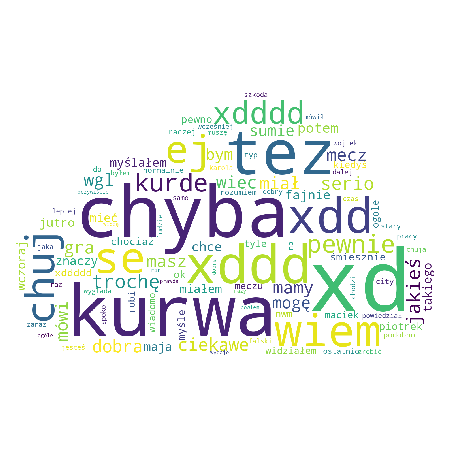

In [11]:
from plot_functions import generate_wordcloud
generate_wordcloud(tokens)